# Sales Prediction using Linear Regression

### 1. Introduction and Problem Statement

##### Introduction
This project focuses on building a **linear regression model** to predict product sales based on advertising expenditure across different marketing channels. The goal is to understand how TV, Radio, and Newspaper advertising impact sales and to provide data-driven insights for better marketing budget allocation.

##### Problem Statement
Can we predict product sales based on amount spent on advertising across different media channels?

Businesses invest heavily in advertising, and understanding which channels drive sales the most is critical for maximizing return on investment (ROI). This project addresses that problem using linear regression.

### 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 3. Load Dataset

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### 4. Data Understanding and Cleaning

In [3]:
# Number of rows and columns
df.shape

(200, 5)

In [4]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
# Data distribution
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

From the result above we can see that there are no missing values.

In [7]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

From the result above we can see that there are no duplicate values

In [8]:
# Checking for any unnecessary columns
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

We can see that the dataset has a column called unnamed which is just an index column. We don't want that so we have to drop the column.

In [ ]:
# Drop the column if it exists, ignore if it doesn't
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [10]:
# Verifying the changes
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

##### Data Interpretation
The dataset contains data of what was spent on advertising across TV, Radio, and Newspaper channels, along with corresponding sales figures. There are no missing values, and all variables are numeric, making the dataset suitable for linear regression analysis.

### 5. Exploratory Data Analysis
Now, we want to visualize relationships.

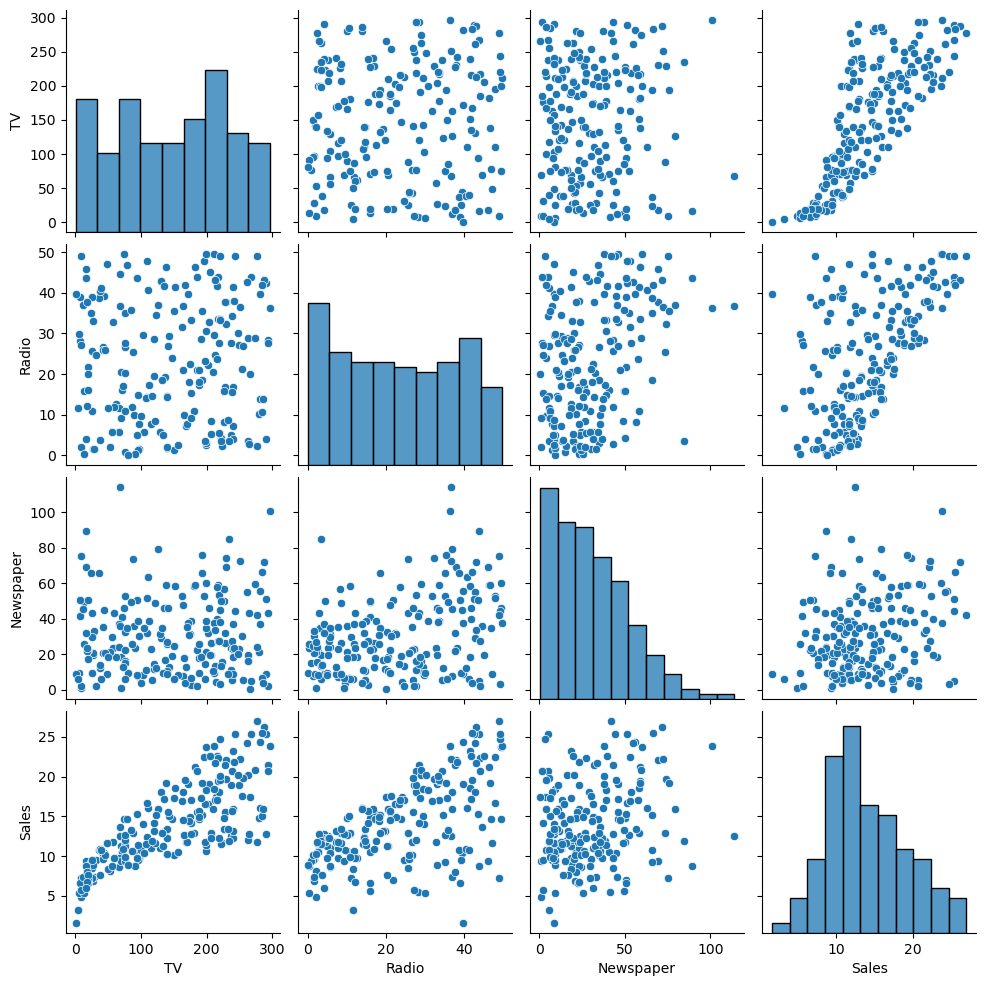

In [11]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

The result above is a pairplot showing the relationship between TV, Radio, Newspaper and sales.
- The diagonal plots are histograms, showing the distribution of each variable.
- The off-diagonal plots are scatter plots, showing pairwise relationships between variables.
- This visualization helps us quickly assess correlation strength, linearity, and potential predictors for Sales.

Let's do a Variable by variable explanation.
1. TV vs Sales
- There is a strong, positive, and nearly linear relationship between TV advertising and Sales.
- As TV advertising spend increases, Sales increase consistently.
- This suggests that TV is a strong predictor of Sales.

2. Radio vs Sales
- The relationship between Radio advertising and Sales is moderately positive.
- Sales generally increase with Radio spend, but with more scatter compared to TV.
- This indicates Radio is a useful but weaker predictor than TV.

3. Newspaper vs Sales
- There is little to no clear linear relationship between Newspaper advertising and Sales.
- The data points are widely scattered, indicating weak correlation.
- This suggests Newspaper advertising contributes less to predicting Sales.

4. Relationships among Predictors
- TV and Radio show some positive association, but not strong enough to suggest multicollinearity.
- TV and Newspaper, as well as Radio and Newspaper, show weak relationships.
- This indicates that most predictors provide distinct information.

Insights from the histograms
- TV spending is fairly evenly distributed across its range.
- Radio spending is moderately spread.
- Newspaper spending is right-skewed, with many low values and few high values.
- Sales are roughly normally distributed, centered around the mid-range.

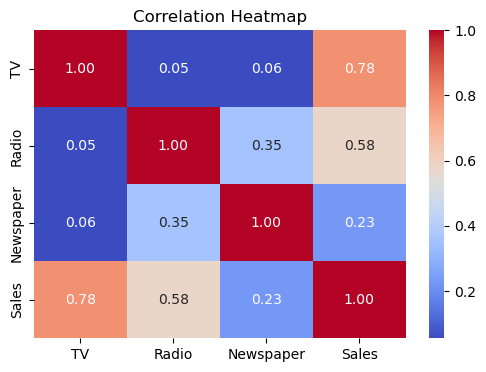

In [12]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### Some key insights from the Correlation Heatmap
Strongest predictor of Sales: TV
- TV and Sales have a strong positive correlation (0.78).
- This indicates that increases in TV advertising spend are strongly associated with increases in Sales.
- TV is therefore the most influential predictor in the dataset.

Moderate relationship: Radio
- Radio and Sales show a moderate positive correlation (0.58).
- This suggests Radio advertising contributes meaningfully to Sales, though less strongly than TV.
- Radio is a useful secondary predictor.

Weak relationship: Newspaper
- Newspaper and Sales have a weak positive correlation (0.23).
- This implies that Newspaper advertising has limited impact on Sales.
- Including Newspaper in a linear model is unlikely to significantly improve predictive performance.

Low multicollinearity among predictors
- TV has very weak correlations with Radio (0.05) and Newspaper (0.06).
- This suggests that the predictors are largely independent of each other.
- Low multicollinearity is desirable and supports the use of multiple predictors in regression without destabilizing coefficient estimates.

Moderate correlation between Radio and Newspaper
- Radio and Newspaper have a correlation of 0.35, indicating a mild association.
- This is not strong enough to raise serious multicollinearity concerns but suggests some overlap in advertising strategies.

##### Overall conclusion
The heatmap confirms that TV and Radio advertising are the most relevant predictors of Sales, with TV being dominant, while Newspaper advertising shows weak explanatory power. The low correlations among predictors support a stable and interpretable linear regression model.

#### Individual Features vs Sales

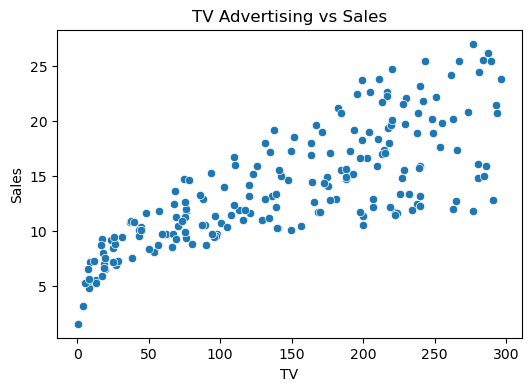

In [21]:
# TV advertising vs Sales scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('TV Advertising vs Sales')
plt.show()

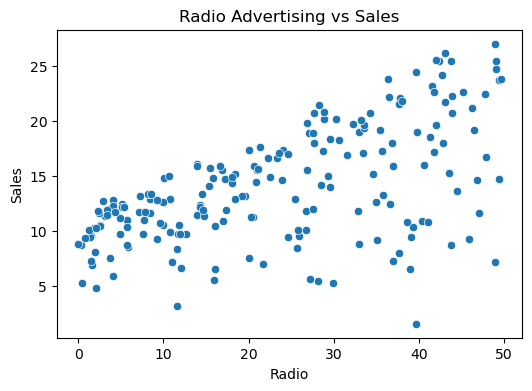

In [22]:
# Radio advertising vs Sales scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.title('Radio Advertising vs Sales')
plt.show()

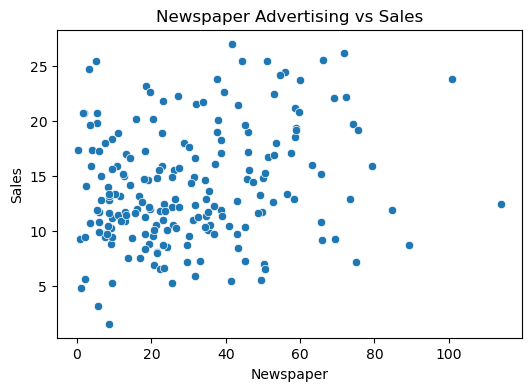

In [23]:
# Newspaper advertising vs Sales scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.title('Newspaper Advertising vs Sales')
plt.show()

##### EDA Insight
From the exploratory data analysis, TV advertising spend shows the strongest positive linear relationship with sales. Radio also exhibits a moderate relationship, while Newspaper advertising has a relatively weak correlation with sales. This suggests that TV advertising is the most influential channel in driving sales.

### 6. Feature Engineering

In [14]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

Even though the relationship between Newspaper spendings and sales is weak, we would be keeping it for now to show the model interpretation later

### 7. Train-Test Split
The dataset is split into training and testing sets using an 80–20 ratio to evaluate the performance of the linear regression model on unseen data, with a random state of 42 applied to ensure reproducibility.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 8. Building the Linear Regression Model

In [16]:
# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Making predictions on the test dataset
y_pred = model.predict(X_test)

### 9. Model Evaluation

In [18]:
# Model evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2 ): {r2:.2f}')

Mean Absolute Error (MAE): 1.46
Mean Squared Error (MSE): 3.17
Root Mean Squared Error (RMSE): 1.78
R-squared (R2 ): 0.90


##### Model Performance Interpretation
The linear regression model achieved an R² score of 0.90, indicating that 90% of the variance in sales is explained by advertising spend across TV, Radio, and Newspaper channels. This suggests that the model has strong predictive performance and generalizes well to unseen data.

### 10. Interpreting Model Coefficients

In [19]:
# The Coefficients Table
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)

     Feature  Coefficient
0         TV     0.044730
1      Radio     0.189195
2  Newspaper     0.002761


##### Coefficient Interpretation
Among the predictors, Radio advertising has the largest coefficient, indicating that an increase in Radio ad spend has the strongest marginal impact on sales, holding other variables constant. TV advertising also contributes positively to sales, while Newspaper advertising has minimal influence, aligning with insights from the exploratory data analysis.

### 11. Model Diagnostic

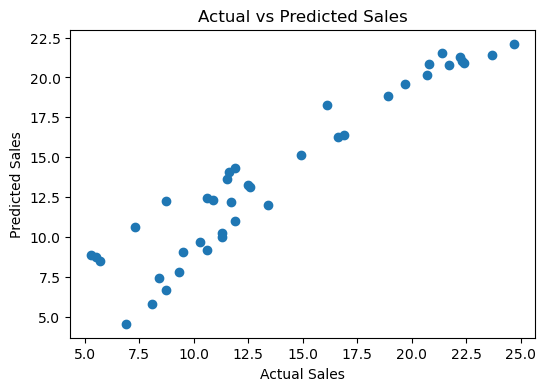

In [20]:
# Actual vs Predicted plot
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

##### Actual vs Predicted Sales Interpretation
The scatter plot shows that most data points lie close to the diagonal line, indicating good agreement between the actual and predicted Sales values. This suggests that the model is able to make accurate predictions for most observations. Additionally, the absence of any clear systematic pattern in the distribution of points supports the appropriateness of the linear regression model, as it indicates that the model captures the underlying relationship in the data without significant bias.

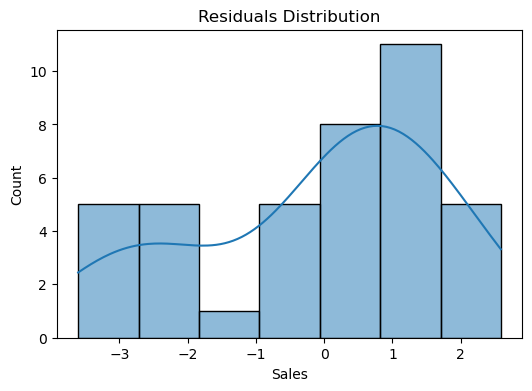

In [21]:
# Analysis of the residual errors
residuals = y_test - y_pred
plt.figure(figsize=(6,4))

sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

##### Residual Diagnostics Interpretation
The residuals are symmetrically distributed around zero, indicating that the model does not exhibit systematic bias in its predictions. The overall shape of the distribution is approximately normal, suggesting that the normality assumption of linear regression is reasonably satisfied. No extreme skewness or outliers are evident, implying that the model captures the underlying relationship in the data effectively. Together, these patterns support the adequacy of the linear regression model and the reliability of its inference results.

### 12. Business Recommendation
Based on the model results, increasing investment in Radio and TV advertising is likely to yield higher sales returns. Newspaper advertising shows minimal impact and may be reconsidered or optimized. Businesses can use this model to forecast sales and allocate marketing budgets more efficiently.

### 13. Conclusion
In this project, a linear regression model was developed using Python to predict product sales based on advertising spend. The project involved data cleaning, exploratory data analysis, feature selection, model training, and evaluation. The final model achieved an R² score of 0.90 and provided interpretable insights into the effectiveness of different advertising channels. This demonstrates the usefulness of linear regression for business decision-making and predictive analytics.